Stationary measurement for noise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
acc = pd.read_csv('data/stationary_phone/Accelerometer.csv', delimiter=';', decimal='.')
gyr = pd.read_csv('data/stationary_phone/Gyroscope.csv', delimiter=';', decimal='.')
mag = pd.read_csv('data/stationary_phone/Magnetometer.csv', delimiter=';', decimal='.')

# Get sampling frequencies for each accelerometer, gyroscope and magnetometer
acc_fs = 100 / (acc['Time (s)'].iloc[99] - acc['Time (s)'].iloc[0])
gyr_fs = 100 / (gyr['Time (s)'].iloc[99] - gyr['Time (s)'].iloc[0])
mag_fs = 100 / (mag['Time (s)'].iloc[99] - mag['Time (s)'].iloc[0])

print("Accelerometer frequency:", acc_fs)
print("Gyroscope frequency:", gyr_fs)
print("Magnetometer frequency:", mag_fs)

Accelerometer frequency: 209.32837007115654
Gyroscope frequency: 418.6473378083915
Magnetometer frequency: 101.010101010101


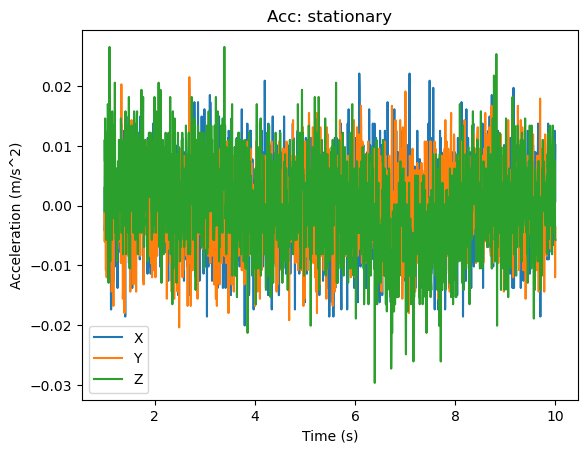

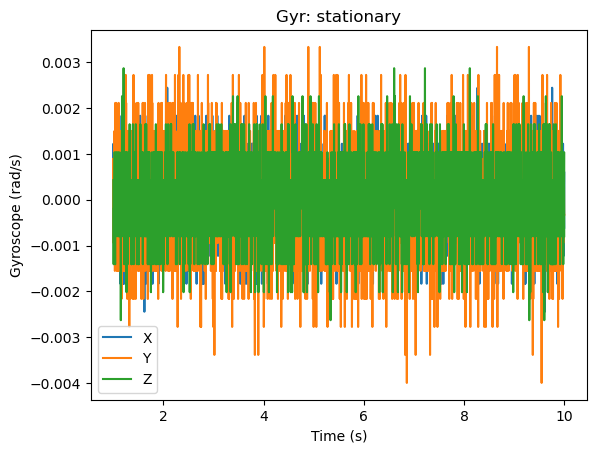

In [5]:
# Remove last and first second where I touched the phone
acc = acc[(acc['Time (s)'] > 1) & (acc['Time (s)'] < 10)]
gyr = gyr[(gyr['Time (s)'] > 1) & (gyr['Time (s)'] < 10)]

# Remove DC offset
acc_x = acc['Acceleration x (m/s^2)'] - np.mean(acc['Acceleration x (m/s^2)'])
acc_y = acc['Acceleration y (m/s^2)'] - np.mean(acc['Acceleration y (m/s^2)'])
acc_z = acc['Acceleration z (m/s^2)'] - np.mean(acc['Acceleration z (m/s^2)'])
gyr_x = gyr['Gyroscope x (rad/s)'] - np.mean(gyr['Gyroscope x (rad/s)'])
gyr_y = gyr['Gyroscope y (rad/s)'] - np.mean(gyr['Gyroscope y (rad/s)'])
gyr_z = gyr['Gyroscope z (rad/s)'] - np.mean(gyr['Gyroscope z (rad/s)'])

plt.plot(acc['Time (s)'], acc_x, label='X')
plt.plot(acc['Time (s)'], acc_y, label='Y')
plt.plot(acc['Time (s)'], acc_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acc: stationary')
plt.legend()
plt.show()

plt.plot(gyr['Time (s)'], gyr_x, label='X')
plt.plot(gyr['Time (s)'], gyr_y, label='Y')
plt.plot(gyr['Time (s)'], gyr_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Gyroscope (rad/s)')
plt.title('Gyr: stationary')
plt.legend()
plt.show()

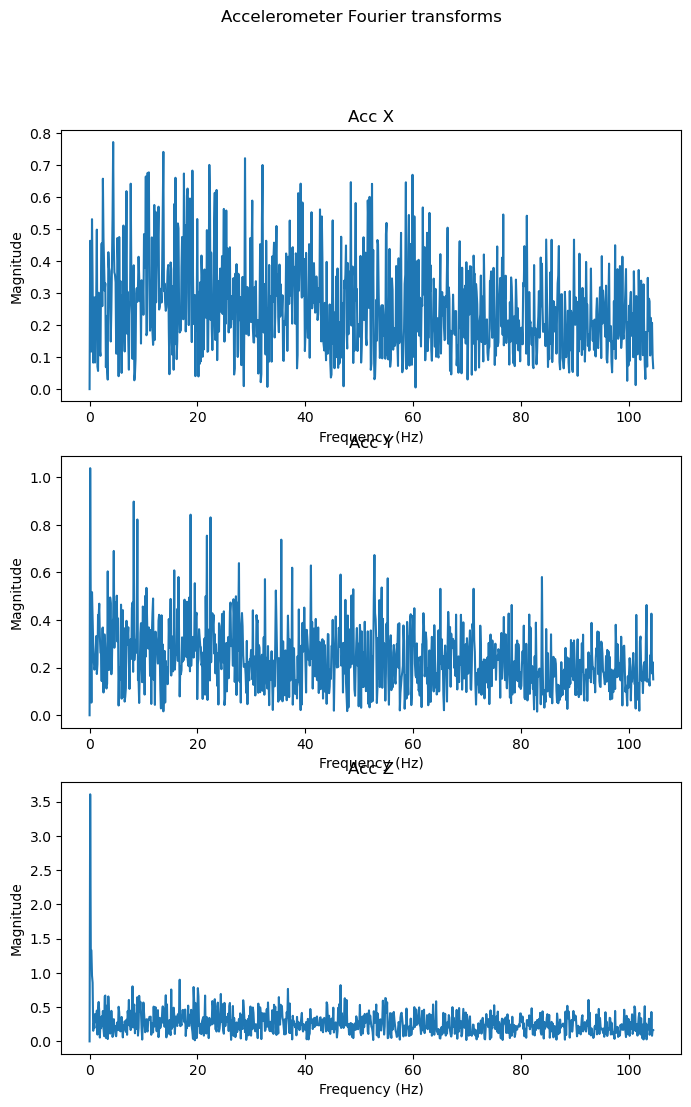

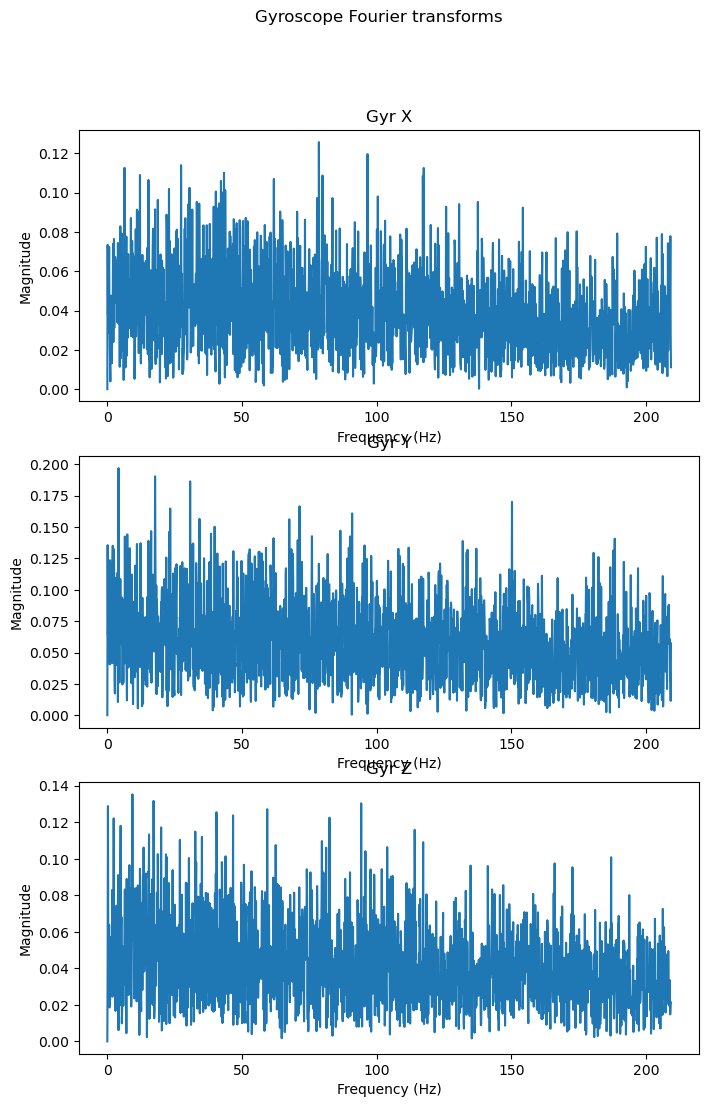

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Compute FFT and frequency axis for accelerometer signals
acc_freqs = np.fft.fftfreq(len(acc_x), 1/acc_fs)
acc_x_fft = np.fft.fft(acc_x)[acc_freqs >= 0]
acc_y_fft = np.fft.fft(acc_y)[acc_freqs >= 0]
acc_z_fft = np.fft.fft(acc_z)[acc_freqs >= 0]
acc_freqs = acc_freqs[acc_freqs >= 0]

# Compute FFT and frequency axis for gyroscope signals
gyr_freqs = np.fft.fftfreq(len(gyr_x), 1/gyr_fs)
gyr_x_fft = np.fft.fft(gyr_x)[gyr_freqs >= 0]
gyr_y_fft = np.fft.fft(gyr_y)[gyr_freqs >= 0]
gyr_z_fft = np.fft.fft(gyr_z)[gyr_freqs >= 0]
gyr_freqs = gyr_freqs[gyr_freqs >= 0]

# Plot accelerometer Fourier transforms
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
ax[0].plot(acc_freqs, np.abs(acc_x_fft))
ax[0].set_title('Acc X')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[1].plot(acc_freqs, np.abs(acc_y_fft))
ax[1].set_title('Acc Y')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[2].plot(acc_freqs, np.abs(acc_z_fft))
ax[2].set_title('Acc Z')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
fig.suptitle('Accelerometer Fourier transforms')

# Plot gyroscope Fourier transforms
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
ax[0].plot(gyr_freqs, np.abs(gyr_x_fft))
ax[0].set_title('Gyr X')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[1].plot(gyr_freqs, np.abs(gyr_y_fft))
ax[1].set_title('Gyr Y')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[2].plot(gyr_freqs, np.abs(gyr_z_fft))
ax[2].set_title('Gyr Z')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
fig.suptitle('Gyroscope Fourier transforms')

plt.show()


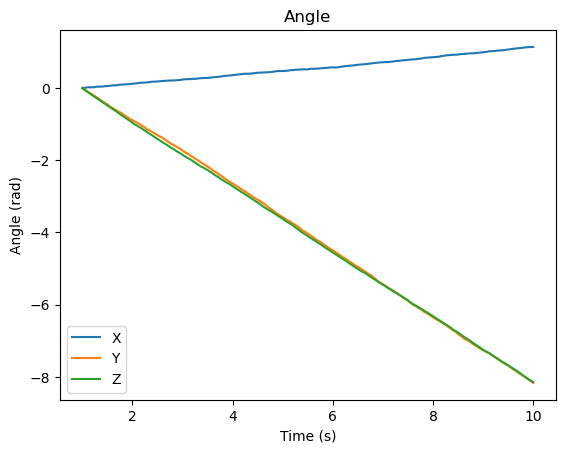

okay now im really curious how to get rid of this linear drift


In [11]:
# Compute the cumulative sum of the gyroscope data for each dimension to get the angle
angle_x = np.cumsum(gyr['Gyroscope x (rad/s)'])
angle_y = np.cumsum(gyr['Gyroscope y (rad/s)'])
angle_z = np.cumsum(gyr['Gyroscope z (rad/s)'])

# Plot the angle for each dimension
plt.plot(gyr['Time (s)'], angle_x, label='X')
plt.plot(gyr['Time (s)'], angle_y, label='Y')
plt.plot(gyr['Time (s)'], angle_z, label='Z')

# Add axis labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle')
plt.legend()
plt.show()
print('okay now im really curious how to get rid of this linear drift')